<a href="https://colab.research.google.com/github/Fahbax/TM10007_group_13/blob/Develop/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template

In [1]:
# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git


Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 83 (delta 13), reused 12 (delta 12), pack-reused 61
Unpacking objects: 100% (83/83), 67.93 MiB | 13.61 MiB/s, done.


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [2]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('/content/tm10007_ml/worclipo/Lipo_radiomicFeatures.csv', index_col=0)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

The number of samples: 115
The number of columns: 494


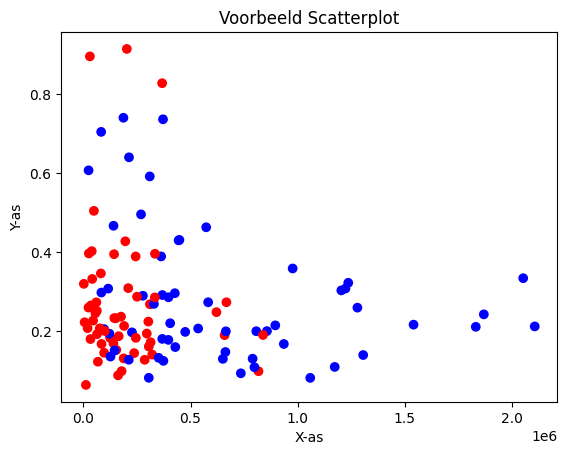

In [3]:
#print(data['label'])#,'PREDICT_original_sf_compactness_avg_2.5D','PREDICT_original_sf_compactness_std_2.5D'])
#df = pd.DataFrame(data, columns=["label", "PREDICT_original_sf_compactness_avg_2.5D","PREDICT_original_sf_compactness_std_2.5D"])
import matplotlib.pyplot as plt
colors = {0: 'red', 1: 'blue'}
#plt.scatter(data['PREDICT_original_sf_compactness_avg_2.5D'], data['PREDICT_original_sf_compactness_std_2.5D'], c=d['label'].map(colors))
plt.scatter(data['PREDICT_original_sf_volume_2.5D'], data['PREDICT_original_tf_Gabor_range_F0.05_A1.57'], c=data['label'].map(colors))

# Voeg labels toe aan de plot
plt.title('Voorbeeld Scatterplot')
plt.xlabel('X-as')
plt.ylabel('Y-as')

# Toon de plot
plt.show()

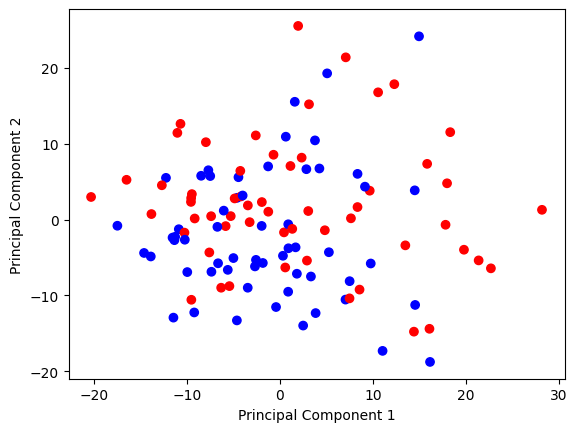

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# laad de gegevens
df = data.iloc[:, 2:]

# normaliseer de gegevens met behulp van StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# haal alle kolommen uit het DataFrame
kolommen = df.columns.tolist()

# pas de PCA toe op de genormaliseerde gegevens
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalized)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])

# plot de resultaten
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=data['label'].map(colors))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [5]:
from scipy.stats import shapiro
df=data.iloc[:,2:]
niet_normaal = 0
for column in df:
    for label in set(data['label']):
        a_values = data.loc[data['label'] == label, column]
        stat, p = shapiro(a_values)
        # interpreteer de uitvoer van de test
        alpha = 0.05
        if p > alpha:
            #print(f'De gegevens lijken normaal verdeeld (fail to reject H0):{column}{label}')
            continue
        else:
            #print(f'De gegevens lijken niet normaal verdeeld (reject H0):{column}{label}')
            niet_normaal+=1


print(niet_normaal)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


783


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local

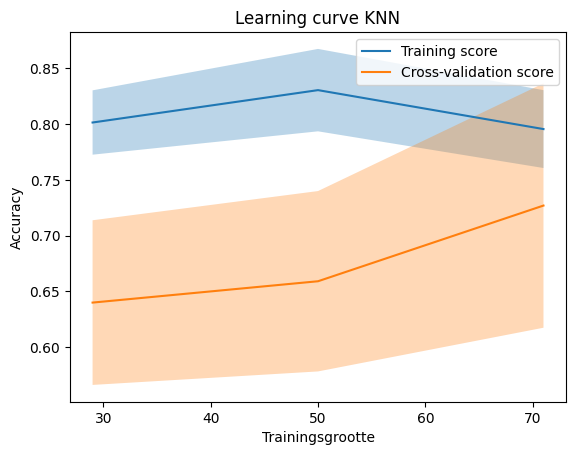

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.19))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=16))])
Accuracy KNN over de loops [0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.782608695652174, 0.6521739130434783]
Mean accuracy KNN 0.7130434782608696 with SD 0.04957284456952774
F1-score KNN over de loops [0.6666666666666665, 0.6666666666666667, 0.7199999999999999, 0.761904761904762, 0.5]
Mean F1 KNN 0.663047619047619 with SD 0.09953269497815535


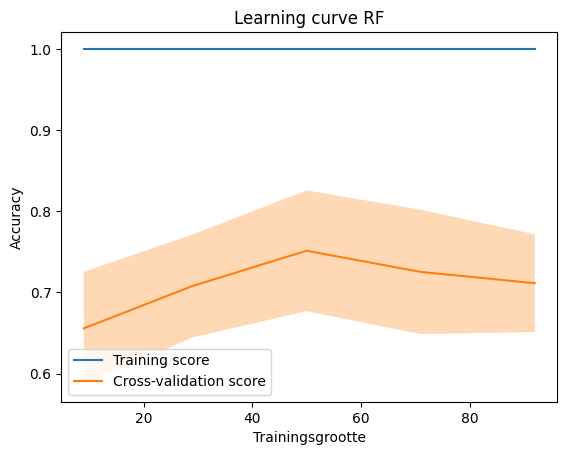

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.11))),
                ('classifier',
                 RandomForestClassifier(max_depth=30, max_features='auto',
                                        n_estimators=501))])
Accuracy RF over de loops [0.6521739130434783, 0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.6086956521739131]
Mean accuracy RF 0.6782608695652174 with SD 0.04957284456952771
F1-score RF over de loops [0.6, 0.7857142857142856, 0.7199999999999999, 0.6956521739130435, 0.5263157894736842]
Mean F1 RF 0.6655364498202027 with SD 0.1024614145646608


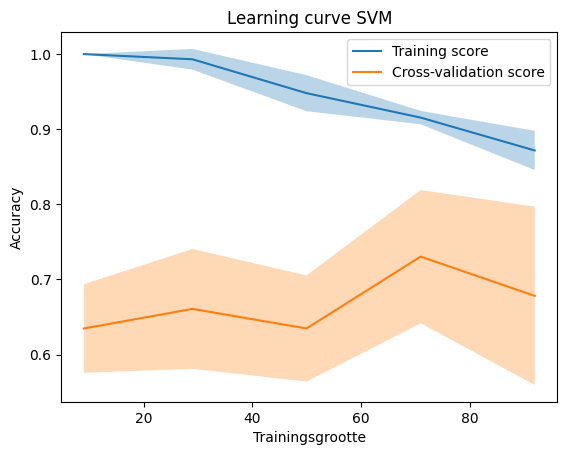

Accuracy SVM over de loops [0.782608695652174, 0.6956521739130435, 0.7391304347826086, 0.4782608695652174, 0.5652173913043478]
Mean accuracy SVM 0.6521739130434783 with SD 0.1267598238009848
F1-score SVM over de loops [0.7368421052631577, 0.7199999999999999, 0.7692307692307693, 0.4999999999999999, 0.4444444444444444]
Mean F1 SVM 0.6341034637876742 with SD 0.15012254550857987


In [36]:
#knn
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from statistics import mean, stdev
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

KNN_acc = []
KNN_f1 = []
KNN_train_mean = []
KNN_train_std = []
KNN_test_mean = []
KNN_test_std = []
RF_acc = []
RF_f1 = []
RF_train_mean = []
RF_train_std = []
RF_test_mean = []
RF_test_std = []
SVM_acc = []
SVM_f1 = []
SVM_train_mean = []
SVM_train_std = []
SVM_test_mean = []
SVM_test_std = []
knn_best_models = []
rf_best_models = []
svm_best_models = []

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(data.index) # returns the number of splitting iterations in the cross-validator
for train_index, test_index in kf.split(data):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]
    X_train = data_train.drop('label', axis=1)
    label_train = data_train['label']
    X_test = data_test.drop('label', axis=1)
    label_test = data_test['label']
    
    # Split de data in train en test sets voor de toekomst
    #X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.15)

    #KNN
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_knn = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', KNeighborsClassifier())])
    parameters_knn = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__n_neighbors': np.arange(1,31,1),
                  'classifier__p': [1, 2],
                  'classifier__leaf_size': np.arange(1,21,1)
                  }
    grid_knn = RandomizedSearchCV(pipe_knn, parameters_knn, n_iter=50).fit(X_train, label_train)
    best_pipe_knn = grid_knn.best_estimator_
    knn_best_models.append(best_pipe_knn)
    label_pred = best_pipe_knn.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    KNN_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    KNN_f1.append(f1)
    KNN_train_sizes,train_scores,test_scores = learning_curve(best_pipe_knn,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    KNN_train_mean.append(train_mean)
    KNN_train_std.append(train_std)
    KNN_test_mean.append(test_mean)
    KNN_test_std.append(test_std)

    #Random forest
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_rf = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', RandomForestClassifier())])
    parameters_rf = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__n_estimators': np.arange(1,1000,50),
                  'classifier__max_features': ['auto', 'sqrt'],
                  'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                  # 'classifier__min_samples_leaf': [1, 2, 4],
                  # 'classifier__min_samples_split': [2, 5, 10],
                  # 'classifier__bootstrap': [True, False],
                  }
    grid_rf = RandomizedSearchCV(pipe_rf, parameters_rf, n_iter=50).fit(X_train, label_train)
    best_pipe_rf = grid_rf.best_estimator_
    rf_best_models.append(best_pipe_rf)
    label_pred = best_pipe_rf.predict(X_test)
    accuracy = accuracy_score(label_test, label_pred)
    RF_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    RF_f1.append(f1)
    RF_train_sizes,train_scores,test_scores = learning_curve(best_pipe_rf,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    RF_train_mean.append(train_mean)
    RF_train_std.append(train_std)
    RF_test_mean.append(test_mean)
    RF_test_std.append(test_std)

    #SVM
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_svm = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', svm.SVC())])
    parameters_svm = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__C': [0.1, 1, 10, 100, 1000],
                  'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'classifier__kernel': ["linear" , "poly", "rbf", "sigmoid", "precomputed"]
                  }
    grid_svm = RandomizedSearchCV(pipe_svm, parameters_svm, n_iter=50).fit(X_train, label_train)
    best_pipe_svm = grid_svm.best_estimator_
    svm_best_models.append(best_pipe_svm)
    label_pred = best_pipe_svm.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    SVM_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    SVM_f1.append(f1)
    SVM_train_sizes,train_scores,test_scores = learning_curve(best_pipe_svm,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    SVM_train_mean.append(train_mean)
    SVM_train_std.append(train_std)
    SVM_test_mean.append(test_mean)
    SVM_test_std.append(test_std)

# Plotten van de learning curve KNN
# print('Training set score: ' + str(grid_knn.score(X_train,label_train)))
# print('Test set score: ' + str(grid_knn.score(X_test,label_test)))

KNN_train_mean_mean = np.mean(KNN_train_mean, axis=0)
KNN_train_mean_std = np.mean(KNN_train_std, axis=0)
KNN_test_mean_mean = np.mean(KNN_test_mean, axis=0)
KNN_test_mean_std = np.mean(KNN_test_std, axis=0)

plt.figure()
plt.plot(KNN_train_sizes, KNN_train_mean_mean,  label="Training score")
plt.plot(KNN_train_sizes, KNN_test_mean_mean, label="Cross-validation score")
plt.fill_between(KNN_train_sizes, KNN_train_mean_mean - KNN_train_mean_std, KNN_train_mean_mean + KNN_train_mean_std, alpha=0.3)
plt.fill_between(KNN_train_sizes, KNN_test_mean_mean - KNN_test_mean_std, KNN_test_mean_mean + KNN_test_mean_std, alpha=0.3)
plt.title('Learning curve KNN')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_KNN_acc = mean(KNN_acc)
std_KNN_acc = stdev(KNN_acc)
mean_KNN_f1 = mean(KNN_f1)
std_KNN_f1 = stdev(KNN_f1)

print(knn_best_models)
print(f'Accuracy KNN over de loops {KNN_acc}')
print(f'Mean accuracy KNN {mean_KNN_acc} with SD {std_KNN_acc}')
print(f'F1-score KNN over de loops {KNN_f1}')
print(f'Mean F1 KNN {mean_KNN_f1} with SD {std_KNN_f1}')

# Plotten van de learning curve RF
RF_train_mean_mean = np.mean(RF_train_mean, axis=0)
RF_train_mean_std = np.mean(RF_train_std, axis=0)
RF_test_mean_mean = np.mean(RF_test_mean, axis=0)
RF_test_mean_std = np.mean(RF_test_std, axis=0)

plt.figure()
plt.plot(RF_train_sizes, RF_train_mean_mean,  label="Training score")
plt.plot(RF_train_sizes, RF_test_mean_mean, label="Cross-validation score")
plt.fill_between(RF_train_sizes, RF_train_mean_mean - RF_train_mean_std, RF_train_mean_mean + RF_train_mean_std, alpha=0.3)
plt.fill_between(RF_train_sizes, RF_test_mean_mean - RF_test_mean_std, RF_test_mean_mean + RF_test_mean_std, alpha=0.3)
plt.title('Learning curve RF')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_RF_acc = mean(RF_acc)
std_RF_acc = stdev(RF_acc)
mean_RF_f1 = mean(RF_f1)
std_RF_f1 = stdev(RF_f1)

print(rf_best_models)
print(f'Accuracy RF over de loops {RF_acc}')
print(f'Mean accuracy RF {mean_RF_acc} with SD {std_RF_acc}')
print(f'F1-score RF over de loops {RF_f1}')
print(f'Mean F1 RF {mean_RF_f1} with SD {std_RF_f1}')

# Plotten van de learning curve SVM
SVM_train_mean_mean = np.mean(SVM_train_mean, axis=0)
SVM_train_mean_std = np.mean(SVM_train_std, axis=0)
SVM_test_mean_mean = np.mean(SVM_test_mean, axis=0)
SVM_test_mean_std = np.mean(SVM_test_std, axis=0)

plt.figure()
plt.plot(SVM_train_sizes, SVM_train_mean_mean,  label="Training score")
plt.plot(SVM_train_sizes, SVM_test_mean_mean, label="Cross-validation score")
plt.fill_between(SVM_train_sizes, SVM_train_mean_mean - SVM_train_mean_std, SVM_train_mean_mean + SVM_train_mean_std, alpha=0.3)
plt.fill_between(SVM_train_sizes, SVM_test_mean_mean - SVM_test_mean_std, SVM_test_mean_mean + SVM_test_mean_std, alpha=0.3)
plt.title('Learning curve SVM')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_SVM_acc = mean(SVM_acc)
std_SVM_acc = stdev(SVM_acc)
mean_SVM_f1 = mean(SVM_f1)
std_SVM_f1 = stdev(SVM_f1)

print(svm_best_models)
print(f'Accuracy SVM over de loops {SVM_acc}')
print(f'Mean accuracy SVM {mean_SVM_acc} with SD {std_SVM_acc}')
print(f'F1-score SVM over de loops {SVM_f1}')
print(f'Mean F1 SVM {mean_SVM_f1} with SD {std_SVM_f1}')

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local

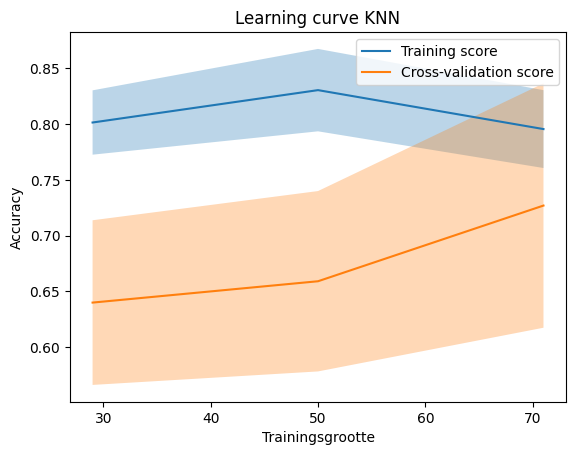

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.19))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=16))])
Accuracy KNN over de loops [0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.782608695652174, 0.6521739130434783]
Mean accuracy KNN 0.7130434782608696 with SD 0.04957284456952774
F1-score KNN over de loops [0.6666666666666665, 0.6666666666666667, 0.7199999999999999, 0.761904761904762, 0.5]
Mean F1 KNN 0.663047619047619 with SD 0.09953269497815535


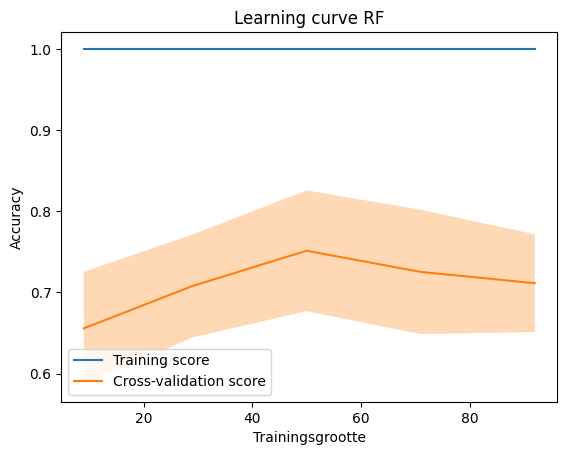

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.11))),
                ('classifier',
                 RandomForestClassifier(max_depth=30, max_features='auto',
                                        n_estimators=501))])
Accuracy RF over de loops [0.6521739130434783, 0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.6086956521739131]
Mean accuracy RF 0.6782608695652174 with SD 0.04957284456952771
F1-score RF over de loops [0.6, 0.7857142857142856, 0.7199999999999999, 0.6956521739130435, 0.5263157894736842]
Mean F1 RF 0.6655364498202027 with SD 0.1024614145646608


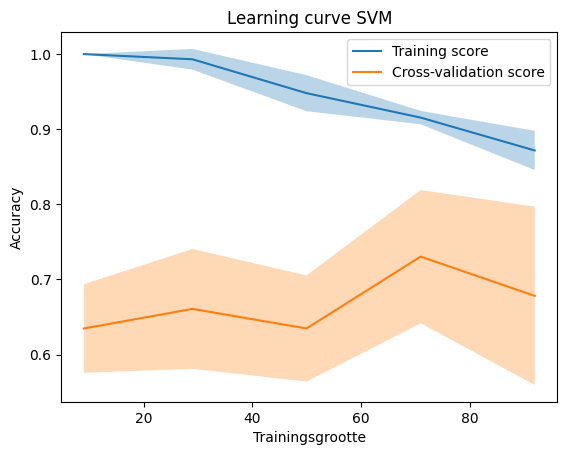

Accuracy SVM over de loops [0.782608695652174, 0.6956521739130435, 0.7391304347826086, 0.4782608695652174, 0.5652173913043478]
Mean accuracy SVM 0.6521739130434783 with SD 0.1267598238009848
F1-score SVM over de loops [0.7368421052631577, 0.7199999999999999, 0.7692307692307693, 0.4999999999999999, 0.4444444444444444]
Mean F1 SVM 0.6341034637876742 with SD 0.15012254550857987


In [ ]:
#rf
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from statistics import mean, stdev
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

KNN_acc = []
KNN_f1 = []
KNN_train_mean = []
KNN_train_std = []
KNN_test_mean = []
KNN_test_std = []
RF_acc = []
RF_f1 = []
RF_train_mean = []
RF_train_std = []
RF_test_mean = []
RF_test_std = []
SVM_acc = []
SVM_f1 = []
SVM_train_mean = []
SVM_train_std = []
SVM_test_mean = []
SVM_test_std = []
knn_best_models = []
rf_best_models = []
svm_best_models = []

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(data.index) # returns the number of splitting iterations in the cross-validator
for train_index, test_index in kf.split(data):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]
    X_train = data_train.drop('label', axis=1)
    label_train = data_train['label']
    X_test = data_test.drop('label', axis=1)
    label_test = data_test['label']
    
    # Split de data in train en test sets voor de toekomst
    #X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.15)

    #KNN
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_knn = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', KNeighborsClassifier())])
    parameters_knn = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__n_neighbors': np.arange(1,31,1),
                  'classifier__p': [1, 2],
                  'classifier__leaf_size': np.arange(1,21,1)
                  }
    grid_knn = RandomizedSearchCV(pipe_knn, parameters_knn, n_iter=50).fit(X_train, label_train)
    best_pipe_knn = grid_knn.best_estimator_
    knn_best_models.append(best_pipe_knn)
    label_pred = best_pipe_knn.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    KNN_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    KNN_f1.append(f1)
    KNN_train_sizes,train_scores,test_scores = learning_curve(best_pipe_knn,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    KNN_train_mean.append(train_mean)
    KNN_train_std.append(train_std)
    KNN_test_mean.append(test_mean)
    KNN_test_std.append(test_std)

    #Random forest
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_rf = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', RandomForestClassifier())])
    parameters_rf = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__n_estimators': np.arange(1,1000,50),
                  'classifier__max_features': ['auto', 'sqrt'],
                  'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                  # 'classifier__min_samples_leaf': [1, 2, 4],
                  # 'classifier__min_samples_split': [2, 5, 10],
                  # 'classifier__bootstrap': [True, False],
                  }
    grid_rf = RandomizedSearchCV(pipe_rf, parameters_rf, n_iter=50).fit(X_train, label_train)
    best_pipe_rf = grid_rf.best_estimator_
    rf_best_models.append(best_pipe_rf)
    label_pred = best_pipe_rf.predict(X_test)
    accuracy = accuracy_score(label_test, label_pred)
    RF_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    RF_f1.append(f1)
    RF_train_sizes,train_scores,test_scores = learning_curve(best_pipe_rf,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    RF_train_mean.append(train_mean)
    RF_train_std.append(train_std)
    RF_test_mean.append(test_mean)
    RF_test_std.append(test_std)

    #SVM
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_svm = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', svm.SVC())])
    parameters_svm = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__C': [0.1, 1, 10, 100, 1000],
                  'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'classifier__kernel': ["linear" , "poly", "rbf", "sigmoid", "precomputed"]
                  }
    grid_svm = RandomizedSearchCV(pipe_svm, parameters_svm, n_iter=50).fit(X_train, label_train)
    best_pipe_svm = grid_svm.best_estimator_
    svm_best_models.append(best_pipe_svm)
    label_pred = best_pipe_svm.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    SVM_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    SVM_f1.append(f1)
    SVM_train_sizes,train_scores,test_scores = learning_curve(best_pipe_svm,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    SVM_train_mean.append(train_mean)
    SVM_train_std.append(train_std)
    SVM_test_mean.append(test_mean)
    SVM_test_std.append(test_std)

# Plotten van de learning curve KNN
# print('Training set score: ' + str(grid_knn.score(X_train,label_train)))
# print('Test set score: ' + str(grid_knn.score(X_test,label_test)))

KNN_train_mean_mean = np.mean(KNN_train_mean, axis=0)
KNN_train_mean_std = np.mean(KNN_train_std, axis=0)
KNN_test_mean_mean = np.mean(KNN_test_mean, axis=0)
KNN_test_mean_std = np.mean(KNN_test_std, axis=0)

plt.figure()
plt.plot(KNN_train_sizes, KNN_train_mean_mean,  label="Training score")
plt.plot(KNN_train_sizes, KNN_test_mean_mean, label="Cross-validation score")
plt.fill_between(KNN_train_sizes, KNN_train_mean_mean - KNN_train_mean_std, KNN_train_mean_mean + KNN_train_mean_std, alpha=0.3)
plt.fill_between(KNN_train_sizes, KNN_test_mean_mean - KNN_test_mean_std, KNN_test_mean_mean + KNN_test_mean_std, alpha=0.3)
plt.title('Learning curve KNN')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_KNN_acc = mean(KNN_acc)
std_KNN_acc = stdev(KNN_acc)
mean_KNN_f1 = mean(KNN_f1)
std_KNN_f1 = stdev(KNN_f1)

print(knn_best_models)
print(f'Accuracy KNN over de loops {KNN_acc}')
print(f'Mean accuracy KNN {mean_KNN_acc} with SD {std_KNN_acc}')
print(f'F1-score KNN over de loops {KNN_f1}')
print(f'Mean F1 KNN {mean_KNN_f1} with SD {std_KNN_f1}')

# Plotten van de learning curve RF
RF_train_mean_mean = np.mean(RF_train_mean, axis=0)
RF_train_mean_std = np.mean(RF_train_std, axis=0)
RF_test_mean_mean = np.mean(RF_test_mean, axis=0)
RF_test_mean_std = np.mean(RF_test_std, axis=0)

plt.figure()
plt.plot(RF_train_sizes, RF_train_mean_mean,  label="Training score")
plt.plot(RF_train_sizes, RF_test_mean_mean, label="Cross-validation score")
plt.fill_between(RF_train_sizes, RF_train_mean_mean - RF_train_mean_std, RF_train_mean_mean + RF_train_mean_std, alpha=0.3)
plt.fill_between(RF_train_sizes, RF_test_mean_mean - RF_test_mean_std, RF_test_mean_mean + RF_test_mean_std, alpha=0.3)
plt.title('Learning curve RF')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_RF_acc = mean(RF_acc)
std_RF_acc = stdev(RF_acc)
mean_RF_f1 = mean(RF_f1)
std_RF_f1 = stdev(RF_f1)

print(rf_best_models)
print(f'Accuracy RF over de loops {RF_acc}')
print(f'Mean accuracy RF {mean_RF_acc} with SD {std_RF_acc}')
print(f'F1-score RF over de loops {RF_f1}')
print(f'Mean F1 RF {mean_RF_f1} with SD {std_RF_f1}')

# Plotten van de learning curve SVM
SVM_train_mean_mean = np.mean(SVM_train_mean, axis=0)
SVM_train_mean_std = np.mean(SVM_train_std, axis=0)
SVM_test_mean_mean = np.mean(SVM_test_mean, axis=0)
SVM_test_mean_std = np.mean(SVM_test_std, axis=0)

plt.figure()
plt.plot(SVM_train_sizes, SVM_train_mean_mean,  label="Training score")
plt.plot(SVM_train_sizes, SVM_test_mean_mean, label="Cross-validation score")
plt.fill_between(SVM_train_sizes, SVM_train_mean_mean - SVM_train_mean_std, SVM_train_mean_mean + SVM_train_mean_std, alpha=0.3)
plt.fill_between(SVM_train_sizes, SVM_test_mean_mean - SVM_test_mean_std, SVM_test_mean_mean + SVM_test_mean_std, alpha=0.3)
plt.title('Learning curve SVM')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_SVM_acc = mean(SVM_acc)
std_SVM_acc = stdev(SVM_acc)
mean_SVM_f1 = mean(SVM_f1)
std_SVM_f1 = stdev(SVM_f1)

print(svm_best_models)
print(f'Accuracy SVM over de loops {SVM_acc}')
print(f'Mean accuracy SVM {mean_SVM_acc} with SD {std_SVM_acc}')
print(f'F1-score SVM over de loops {SVM_f1}')
print(f'Mean F1 SVM {mean_SVM_f1} with SD {std_SVM_f1}')

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local

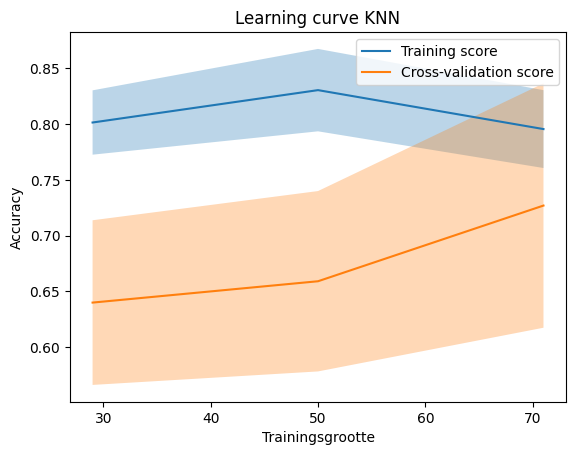

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.19))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=16))])
Accuracy KNN over de loops [0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.782608695652174, 0.6521739130434783]
Mean accuracy KNN 0.7130434782608696 with SD 0.04957284456952774
F1-score KNN over de loops [0.6666666666666665, 0.6666666666666667, 0.7199999999999999, 0.761904761904762, 0.5]
Mean F1 KNN 0.663047619047619 with SD 0.09953269497815535


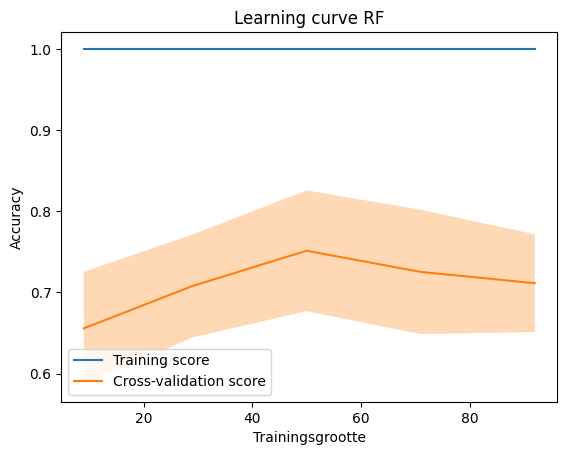

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.11))),
                ('classifier',
                 RandomForestClassifier(max_depth=30, max_features='auto',
                                        n_estimators=501))])
Accuracy RF over de loops [0.6521739130434783, 0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.6086956521739131]
Mean accuracy RF 0.6782608695652174 with SD 0.04957284456952771
F1-score RF over de loops [0.6, 0.7857142857142856, 0.7199999999999999, 0.6956521739130435, 0.5263157894736842]
Mean F1 RF 0.6655364498202027 with SD 0.1024614145646608


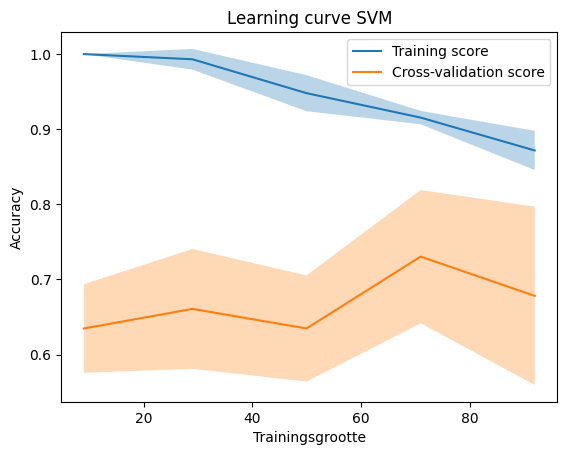

Accuracy SVM over de loops [0.782608695652174, 0.6956521739130435, 0.7391304347826086, 0.4782608695652174, 0.5652173913043478]
Mean accuracy SVM 0.6521739130434783 with SD 0.1267598238009848
F1-score SVM over de loops [0.7368421052631577, 0.7199999999999999, 0.7692307692307693, 0.4999999999999999, 0.4444444444444444]
Mean F1 SVM 0.6341034637876742 with SD 0.15012254550857987


In [ ]:
#svm
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from statistics import mean, stdev
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

KNN_acc = []
KNN_f1 = []
KNN_train_mean = []
KNN_train_std = []
KNN_test_mean = []
KNN_test_std = []
RF_acc = []
RF_f1 = []
RF_train_mean = []
RF_train_std = []
RF_test_mean = []
RF_test_std = []
SVM_acc = []
SVM_f1 = []
SVM_train_mean = []
SVM_train_std = []
SVM_test_mean = []
SVM_test_std = []
knn_best_models = []
rf_best_models = []
svm_best_models = []

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(data.index) # returns the number of splitting iterations in the cross-validator
for train_index, test_index in kf.split(data):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]
    X_train = data_train.drop('label', axis=1)
    label_train = data_train['label']
    X_test = data_test.drop('label', axis=1)
    label_test = data_test['label']
    
    # Split de data in train en test sets voor de toekomst
    #X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.15)

    #KNN
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_knn = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', KNeighborsClassifier())])
    parameters_knn = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__n_neighbors': np.arange(1,31,1),
                  'classifier__p': [1, 2],
                  'classifier__leaf_size': np.arange(1,21,1)
                  }
    grid_knn = RandomizedSearchCV(pipe_knn, parameters_knn, n_iter=50).fit(X_train, label_train)
    best_pipe_knn = grid_knn.best_estimator_
    knn_best_models.append(best_pipe_knn)
    label_pred = best_pipe_knn.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    KNN_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    KNN_f1.append(f1)
    KNN_train_sizes,train_scores,test_scores = learning_curve(best_pipe_knn,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    KNN_train_mean.append(train_mean)
    KNN_train_std.append(train_std)
    KNN_test_mean.append(test_mean)
    KNN_test_std.append(test_std)

    #Random forest
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_rf = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', RandomForestClassifier())])
    parameters_rf = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__n_estimators': np.arange(1,1000,50),
                  'classifier__max_features': ['auto', 'sqrt'],
                  'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                  # 'classifier__min_samples_leaf': [1, 2, 4],
                  # 'classifier__min_samples_split': [2, 5, 10],
                  # 'classifier__bootstrap': [True, False],
                  }
    grid_rf = RandomizedSearchCV(pipe_rf, parameters_rf, n_iter=50).fit(X_train, label_train)
    best_pipe_rf = grid_rf.best_estimator_
    rf_best_models.append(best_pipe_rf)
    label_pred = best_pipe_rf.predict(X_test)
    accuracy = accuracy_score(label_test, label_pred)
    RF_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    RF_f1.append(f1)
    RF_train_sizes,train_scores,test_scores = learning_curve(best_pipe_rf,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    RF_train_mean.append(train_mean)
    RF_train_std.append(train_std)
    RF_test_mean.append(test_mean)
    RF_test_std.append(test_std)

    #SVM
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_svm = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', svm.SVC())])
    parameters_svm = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__C': [0.1, 1, 10, 100, 1000],
                  'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'classifier__kernel': ["linear" , "poly", "rbf", "sigmoid", "precomputed"]
                  }
    grid_svm = RandomizedSearchCV(pipe_svm, parameters_svm, n_iter=50).fit(X_train, label_train)
    best_pipe_svm = grid_svm.best_estimator_
    svm_best_models.append(best_pipe_svm)
    label_pred = best_pipe_svm.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    SVM_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    SVM_f1.append(f1)
    SVM_train_sizes,train_scores,test_scores = learning_curve(best_pipe_svm,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    SVM_train_mean.append(train_mean)
    SVM_train_std.append(train_std)
    SVM_test_mean.append(test_mean)
    SVM_test_std.append(test_std)

# Plotten van de learning curve KNN
# print('Training set score: ' + str(grid_knn.score(X_train,label_train)))
# print('Test set score: ' + str(grid_knn.score(X_test,label_test)))

KNN_train_mean_mean = np.mean(KNN_train_mean, axis=0)
KNN_train_mean_std = np.mean(KNN_train_std, axis=0)
KNN_test_mean_mean = np.mean(KNN_test_mean, axis=0)
KNN_test_mean_std = np.mean(KNN_test_std, axis=0)

plt.figure()
plt.plot(KNN_train_sizes, KNN_train_mean_mean,  label="Training score")
plt.plot(KNN_train_sizes, KNN_test_mean_mean, label="Cross-validation score")
plt.fill_between(KNN_train_sizes, KNN_train_mean_mean - KNN_train_mean_std, KNN_train_mean_mean + KNN_train_mean_std, alpha=0.3)
plt.fill_between(KNN_train_sizes, KNN_test_mean_mean - KNN_test_mean_std, KNN_test_mean_mean + KNN_test_mean_std, alpha=0.3)
plt.title('Learning curve KNN')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_KNN_acc = mean(KNN_acc)
std_KNN_acc = stdev(KNN_acc)
mean_KNN_f1 = mean(KNN_f1)
std_KNN_f1 = stdev(KNN_f1)

print(knn_best_models)
print(f'Accuracy KNN over de loops {KNN_acc}')
print(f'Mean accuracy KNN {mean_KNN_acc} with SD {std_KNN_acc}')
print(f'F1-score KNN over de loops {KNN_f1}')
print(f'Mean F1 KNN {mean_KNN_f1} with SD {std_KNN_f1}')

# Plotten van de learning curve RF
RF_train_mean_mean = np.mean(RF_train_mean, axis=0)
RF_train_mean_std = np.mean(RF_train_std, axis=0)
RF_test_mean_mean = np.mean(RF_test_mean, axis=0)
RF_test_mean_std = np.mean(RF_test_std, axis=0)

plt.figure()
plt.plot(RF_train_sizes, RF_train_mean_mean,  label="Training score")
plt.plot(RF_train_sizes, RF_test_mean_mean, label="Cross-validation score")
plt.fill_between(RF_train_sizes, RF_train_mean_mean - RF_train_mean_std, RF_train_mean_mean + RF_train_mean_std, alpha=0.3)
plt.fill_between(RF_train_sizes, RF_test_mean_mean - RF_test_mean_std, RF_test_mean_mean + RF_test_mean_std, alpha=0.3)
plt.title('Learning curve RF')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_RF_acc = mean(RF_acc)
std_RF_acc = stdev(RF_acc)
mean_RF_f1 = mean(RF_f1)
std_RF_f1 = stdev(RF_f1)

print(rf_best_models)
print(f'Accuracy RF over de loops {RF_acc}')
print(f'Mean accuracy RF {mean_RF_acc} with SD {std_RF_acc}')
print(f'F1-score RF over de loops {RF_f1}')
print(f'Mean F1 RF {mean_RF_f1} with SD {std_RF_f1}')

# Plotten van de learning curve SVM
SVM_train_mean_mean = np.mean(SVM_train_mean, axis=0)
SVM_train_mean_std = np.mean(SVM_train_std, axis=0)
SVM_test_mean_mean = np.mean(SVM_test_mean, axis=0)
SVM_test_mean_std = np.mean(SVM_test_std, axis=0)

plt.figure()
plt.plot(SVM_train_sizes, SVM_train_mean_mean,  label="Training score")
plt.plot(SVM_train_sizes, SVM_test_mean_mean, label="Cross-validation score")
plt.fill_between(SVM_train_sizes, SVM_train_mean_mean - SVM_train_mean_std, SVM_train_mean_mean + SVM_train_mean_std, alpha=0.3)
plt.fill_between(SVM_train_sizes, SVM_test_mean_mean - SVM_test_mean_std, SVM_test_mean_mean + SVM_test_mean_std, alpha=0.3)
plt.title('Learning curve SVM')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_SVM_acc = mean(SVM_acc)
std_SVM_acc = stdev(SVM_acc)
mean_SVM_f1 = mean(SVM_f1)
std_SVM_f1 = stdev(SVM_f1)

print(svm_best_models)
print(f'Accuracy SVM over de loops {SVM_acc}')
print(f'Mean accuracy SVM {mean_SVM_acc} with SD {std_SVM_acc}')
print(f'F1-score SVM over de loops {SVM_f1}')
print(f'Mean F1 SVM {mean_SVM_f1} with SD {std_SVM_f1}')

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local

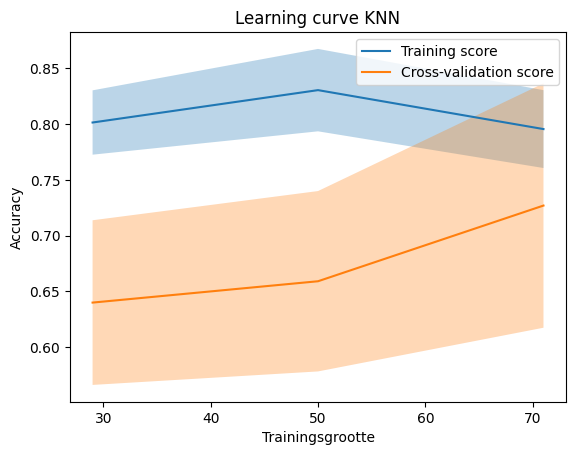

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.19))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=16))])
Accuracy KNN over de loops [0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.782608695652174, 0.6521739130434783]
Mean accuracy KNN 0.7130434782608696 with SD 0.04957284456952774
F1-score KNN over de loops [0.6666666666666665, 0.6666666666666667, 0.7199999999999999, 0.761904761904762, 0.5]
Mean F1 KNN 0.663047619047619 with SD 0.09953269497815535


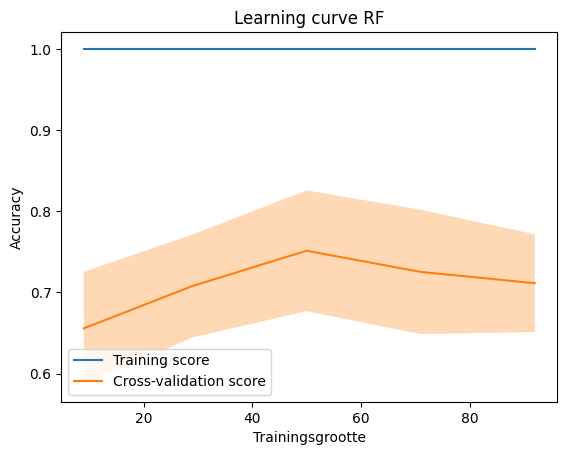

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.11))),
                ('classifier',
                 RandomForestClassifier(max_depth=30, max_features='auto',
                                        n_estimators=501))])
Accuracy RF over de loops [0.6521739130434783, 0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.6086956521739131]
Mean accuracy RF 0.6782608695652174 with SD 0.04957284456952771
F1-score RF over de loops [0.6, 0.7857142857142856, 0.7199999999999999, 0.6956521739130435, 0.5263157894736842]
Mean F1 RF 0.6655364498202027 with SD 0.1024614145646608


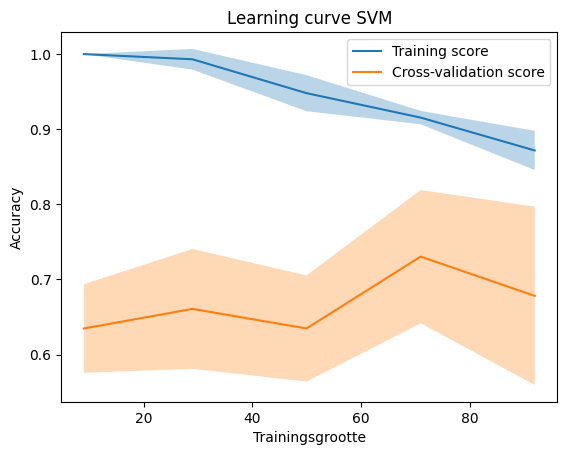

Accuracy SVM over de loops [0.782608695652174, 0.6956521739130435, 0.7391304347826086, 0.4782608695652174, 0.5652173913043478]
Mean accuracy SVM 0.6521739130434783 with SD 0.1267598238009848
F1-score SVM over de loops [0.7368421052631577, 0.7199999999999999, 0.7692307692307693, 0.4999999999999999, 0.4444444444444444]
Mean F1 SVM 0.6341034637876742 with SD 0.15012254550857987


In [ ]:
#iedereen afblijveen!!!!!!
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from statistics import mean, stdev
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

KNN_acc = []
KNN_f1 = []
KNN_train_mean = []
KNN_train_std = []
KNN_test_mean = []
KNN_test_std = []
RF_acc = []
RF_f1 = []
RF_train_mean = []
RF_train_std = []
RF_test_mean = []
RF_test_std = []
SVM_acc = []
SVM_f1 = []
SVM_train_mean = []
SVM_train_std = []
SVM_test_mean = []
SVM_test_std = []
knn_best_models = []
rf_best_models = []
svm_best_models = []

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(data.index) # returns the number of splitting iterations in the cross-validator
for train_index, test_index in kf.split(data):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]
    X_train = data_train.drop('label', axis=1)
    label_train = data_train['label']
    X_test = data_test.drop('label', axis=1)
    label_test = data_test['label']
    
    # Split de data in train en test sets voor de toekomst
    #X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.15)

    #KNN
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_knn = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', KNeighborsClassifier())])
    parameters_knn = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__n_neighbors': np.arange(1,31,1),
                  'classifier__p': [1, 2],
                  'classifier__leaf_size': np.arange(1,21,1)
                  }
    grid_knn = RandomizedSearchCV(pipe_knn, parameters_knn, n_iter=50).fit(X_train, label_train)
    best_pipe_knn = grid_knn.best_estimator_
    knn_best_models.append(best_pipe_knn)
    label_pred = best_pipe_knn.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    KNN_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    KNN_f1.append(f1)
    KNN_train_sizes,train_scores,test_scores = learning_curve(best_pipe_knn,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    KNN_train_mean.append(train_mean)
    KNN_train_std.append(train_std)
    KNN_test_mean.append(test_mean)
    KNN_test_std.append(test_std)

    #Random forest
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_rf = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', RandomForestClassifier())])
    parameters_rf = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__n_estimators': np.arange(1,1000,50),
                  'classifier__max_features': ['auto', 'sqrt'],
                  'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                  # 'classifier__min_samples_leaf': [1, 2, 4],
                  # 'classifier__min_samples_split': [2, 5, 10],
                  # 'classifier__bootstrap': [True, False],
                  }
    grid_rf = RandomizedSearchCV(pipe_rf, parameters_rf, n_iter=50).fit(X_train, label_train)
    best_pipe_rf = grid_rf.best_estimator_
    rf_best_models.append(best_pipe_rf)
    label_pred = best_pipe_rf.predict(X_test)
    accuracy = accuracy_score(label_test, label_pred)
    RF_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    RF_f1.append(f1)
    RF_train_sizes,train_scores,test_scores = learning_curve(best_pipe_rf,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    RF_train_mean.append(train_mean)
    RF_train_std.append(train_std)
    RF_test_mean.append(test_mean)
    RF_test_std.append(test_std)

    #SVM
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_svm = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', svm.SVC())])
    parameters_svm = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__C': [0.1, 1, 10, 100, 1000],
                  'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'classifier__kernel': ["linear" , "poly", "rbf", "sigmoid", "precomputed"]
                  }
    grid_svm = RandomizedSearchCV(pipe_svm, parameters_svm, n_iter=50).fit(X_train, label_train)
    best_pipe_svm = grid_svm.best_estimator_
    svm_best_models.append(best_pipe_svm)
    label_pred = best_pipe_svm.predict(X_test)
    # Bereken de nauwkeurigheid van het model
    accuracy = accuracy_score(label_test, label_pred)
    SVM_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    SVM_f1.append(f1)
    SVM_train_sizes,train_scores,test_scores = learning_curve(best_pipe_svm,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    SVM_train_mean.append(train_mean)
    SVM_train_std.append(train_std)
    SVM_test_mean.append(test_mean)
    SVM_test_std.append(test_std)

# Plotten van de learning curve KNN
# print('Training set score: ' + str(grid_knn.score(X_train,label_train)))
# print('Test set score: ' + str(grid_knn.score(X_test,label_test)))

KNN_train_mean_mean = np.mean(KNN_train_mean, axis=0)
KNN_train_mean_std = np.mean(KNN_train_std, axis=0)
KNN_test_mean_mean = np.mean(KNN_test_mean, axis=0)
KNN_test_mean_std = np.mean(KNN_test_std, axis=0)

plt.figure()
plt.plot(KNN_train_sizes, KNN_train_mean_mean,  label="Training score")
plt.plot(KNN_train_sizes, KNN_test_mean_mean, label="Cross-validation score")
plt.fill_between(KNN_train_sizes, KNN_train_mean_mean - KNN_train_mean_std, KNN_train_mean_mean + KNN_train_mean_std, alpha=0.3)
plt.fill_between(KNN_train_sizes, KNN_test_mean_mean - KNN_test_mean_std, KNN_test_mean_mean + KNN_test_mean_std, alpha=0.3)
plt.title('Learning curve KNN')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_KNN_acc = mean(KNN_acc)
std_KNN_acc = stdev(KNN_acc)
mean_KNN_f1 = mean(KNN_f1)
std_KNN_f1 = stdev(KNN_f1)

print(knn_best_models)
print(f'Accuracy KNN over de loops {KNN_acc}')
print(f'Mean accuracy KNN {mean_KNN_acc} with SD {std_KNN_acc}')
print(f'F1-score KNN over de loops {KNN_f1}')
print(f'Mean F1 KNN {mean_KNN_f1} with SD {std_KNN_f1}')

# Plotten van de learning curve RF
RF_train_mean_mean = np.mean(RF_train_mean, axis=0)
RF_train_mean_std = np.mean(RF_train_std, axis=0)
RF_test_mean_mean = np.mean(RF_test_mean, axis=0)
RF_test_mean_std = np.mean(RF_test_std, axis=0)

plt.figure()
plt.plot(RF_train_sizes, RF_train_mean_mean,  label="Training score")
plt.plot(RF_train_sizes, RF_test_mean_mean, label="Cross-validation score")
plt.fill_between(RF_train_sizes, RF_train_mean_mean - RF_train_mean_std, RF_train_mean_mean + RF_train_mean_std, alpha=0.3)
plt.fill_between(RF_train_sizes, RF_test_mean_mean - RF_test_mean_std, RF_test_mean_mean + RF_test_mean_std, alpha=0.3)
plt.title('Learning curve RF')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_RF_acc = mean(RF_acc)
std_RF_acc = stdev(RF_acc)
mean_RF_f1 = mean(RF_f1)
std_RF_f1 = stdev(RF_f1)

print(rf_best_models)
print(f'Accuracy RF over de loops {RF_acc}')
print(f'Mean accuracy RF {mean_RF_acc} with SD {std_RF_acc}')
print(f'F1-score RF over de loops {RF_f1}')
print(f'Mean F1 RF {mean_RF_f1} with SD {std_RF_f1}')

# Plotten van de learning curve SVM
SVM_train_mean_mean = np.mean(SVM_train_mean, axis=0)
SVM_train_mean_std = np.mean(SVM_train_std, axis=0)
SVM_test_mean_mean = np.mean(SVM_test_mean, axis=0)
SVM_test_mean_std = np.mean(SVM_test_std, axis=0)

plt.figure()
plt.plot(SVM_train_sizes, SVM_train_mean_mean,  label="Training score")
plt.plot(SVM_train_sizes, SVM_test_mean_mean, label="Cross-validation score")
plt.fill_between(SVM_train_sizes, SVM_train_mean_mean - SVM_train_mean_std, SVM_train_mean_mean + SVM_train_mean_std, alpha=0.3)
plt.fill_between(SVM_train_sizes, SVM_test_mean_mean - SVM_test_mean_std, SVM_test_mean_mean + SVM_test_mean_std, alpha=0.3)
plt.title('Learning curve SVM')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_SVM_acc = mean(SVM_acc)
std_SVM_acc = stdev(SVM_acc)
mean_SVM_f1 = mean(SVM_f1)
std_SVM_f1 = stdev(SVM_f1)

print(svm_best_models)
print(f'Accuracy SVM over de loops {SVM_acc}')
print(f'Mean accuracy SVM {mean_SVM_acc} with SD {std_SVM_acc}')
print(f'F1-score SVM over de loops {SVM_f1}')
print(f'Mean F1 SVM {mean_SVM_f1} with SD {std_SVM_f1}')